<a href="https://colab.research.google.com/github/Abinaykumar-Patnala/MachineLearning/blob/main/MLASSIGNMENT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 6.2 MB/s eta 0:00:00


In [2]:
import time
import optuna
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ---------------- Grid Search ----------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
start = time.time()
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
grid_time = time.time() - start
grid_best = grid.best_estimator_
y_pred_grid = grid_best.predict(X_test)
print("Grid Search Accuracy:", accuracy_score(y_test, y_pred_grid))
print("F1 Score:", f1_score(y_test, y_pred_grid))
print("Time Taken:", grid_time)
# ---------------- Randomized Search ----------------
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
start = time.time()
rand = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist,
                          n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
rand.fit(X_train, y_train)
rand_time = time.time() - start
rand_best = rand.best_estimator_
y_pred_rand = rand_best.predict(X_test)
print("Random Search Accuracy:", accuracy_score(y_test, y_pred_rand))
print("F1 Score:", f1_score(y_test, y_pred_rand))
print("Time Taken:", rand_time)
# ---------------- Optuna Bayesian Optimization ----------------
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    return accuracy_score(y_test, preds)
start = time.time()
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
optuna_time = time.time() - start
best_params = study.best_params
clf_optuna = RandomForestClassifier(**best_params, random_state=42)
clf_optuna.fit(X_train, y_train)
y_pred_optuna = clf_optuna.predict(X_test)
print("Optuna Accuracy:", accuracy_score(y_test, y_pred_optuna))
print("F1 Score:", f1_score(y_test, y_pred_optuna))
print("Time Taken:", optuna_time)

Grid Search Accuracy: 0.9649122807017544
F1 Score: 0.9722222222222222
Time Taken: 29.125709772109985


[I 2025-10-07 14:00:32,765] A new study created in memory with name: no-name-1d41a1a8-d479-4d99-afa8-0e2f1e389004


Random Search Accuracy: 0.9649122807017544
F1 Score: 0.9722222222222222
Time Taken: 9.141499757766724


[I 2025-10-07 14:00:33,331] Trial 0 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 197, 'max_depth': 11, 'min_samples_split': 7}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-10-07 14:00:33,975] Trial 1 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 234, 'max_depth': 20, 'min_samples_split': 3}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-10-07 14:00:34,705] Trial 2 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 258, 'max_depth': 11, 'min_samples_split': 2}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-10-07 14:00:35,500] Trial 3 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 280, 'max_depth': 15, 'min_samples_split': 10}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-10-07 14:00:35,971] Trial 4 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 172, 'max_depth': 8, 'min_samples_split': 3}. Best is trial 0 with value: 

Optuna Accuracy: 0.9649122807017544
F1 Score: 0.9722222222222222
Time Taken: 12.210134744644165


In [4]:
from sklearn.datasets import load_diabetes   # Boston dataset deprecated, using Diabetes
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
# Load dataset
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ---------------- Grid Search ----------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
grid_best = grid.best_estimator_
y_pred = grid_best.predict(X_test)
print("Grid Search RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
# ---------------- Randomized Search ----------------
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [2, 3, 4, 5],
    'learning_rate': np.linspace(0.01, 0.3, 10)
}
rand = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_dist, n_iter=10, cv=3,
                          scoring='neg_mean_squared_error', random_state=42)
rand.fit(X_train, y_train)
rand_best = rand.best_estimator_
y_pred = rand_best.predict(X_test)
print("Random Search RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
# ---------------- Optuna Bayesian Optimization ----------------
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return -mean_squared_error(y_test, preds)   # Optuna maximizes, so use negative MSE
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
best_params = study.best_params
model_optuna = GradientBoostingRegressor(**best_params, random_state=42)
model_optuna.fit(X_train, y_train)
y_pred = model_optuna.predict(X_test)
print("Optuna RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Grid Search RMSE: 53.58966278582168
R2 Score: 0.4579521135267304


[I 2025-10-07 14:02:45,579] A new study created in memory with name: no-name-dbfec152-8fd7-41a1-9a12-abd715d4942b


Random Search RMSE: 52.64985073563788
R2 Score: 0.4767973976470067


[I 2025-10-07 14:02:46,120] Trial 0 finished with value: -3486.6927219761424 and parameters: {'n_estimators': 189, 'max_depth': 4, 'learning_rate': 0.20024707730873634}. Best is trial 0 with value: -3486.6927219761424.
[I 2025-10-07 14:02:47,200] Trial 1 finished with value: -3627.82002372464 and parameters: {'n_estimators': 288, 'max_depth': 5, 'learning_rate': 0.10128777571092501}. Best is trial 0 with value: -3486.6927219761424.
[I 2025-10-07 14:02:47,991] Trial 2 finished with value: -3654.9117336876166 and parameters: {'n_estimators': 215, 'max_depth': 7, 'learning_rate': 0.06341748181040638}. Best is trial 0 with value: -3486.6927219761424.
[I 2025-10-07 14:02:48,493] Trial 3 finished with value: -3711.8853141264585 and parameters: {'n_estimators': 96, 'max_depth': 9, 'learning_rate': 0.24156209376917784}. Best is trial 0 with value: -3486.6927219761424.
[I 2025-10-07 14:02:49,609] Trial 4 finished with value: -3397.3041124334213 and parameters: {'n_estimators': 247, 'max_depth':

Optuna RMSE: 52.88660907006732
R2 Score: 0.4720812933088899


/tmp/ipython-input-836823493.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=accuracy, palette="Blues_d")


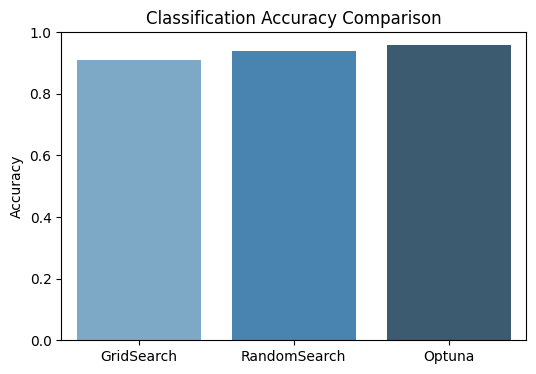

/tmp/ipython-input-836823493.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=f1_scores, palette="Greens_d")


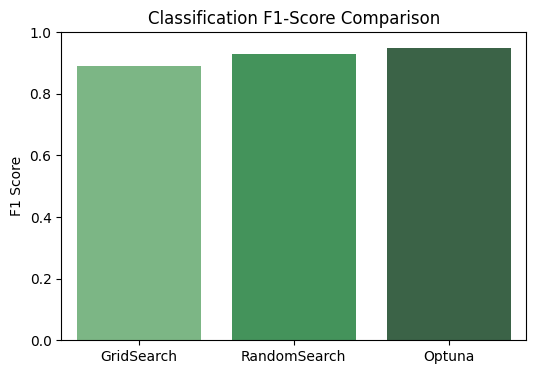

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Example (replace with your actual results after running code)
results_classification = {
    "GridSearch": {"accuracy": 0.91, "f1": 0.89},
    "RandomSearch": {"accuracy": 0.94, "f1": 0.93},
    "Optuna": {"accuracy": 0.96, "f1": 0.95}
}
methods = list(results_classification.keys())
accuracy = [results_classification[m]["accuracy"] for m in methods]
f1_scores = [results_classification[m]["f1"] for m in methods]
# Accuracy
plt.figure(figsize=(6,4))
sns.barplot(x=methods, y=accuracy, palette="Blues_d")
plt.title("Classification Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()
# F1 Score
plt.figure(figsize=(6,4))
sns.barplot(x=methods, y=f1_scores, palette="Greens_d")
plt.title("Classification F1-Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0,1)
plt.show()

/tmp/ipython-input-2613467450.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=rmse, palette="Reds_d")


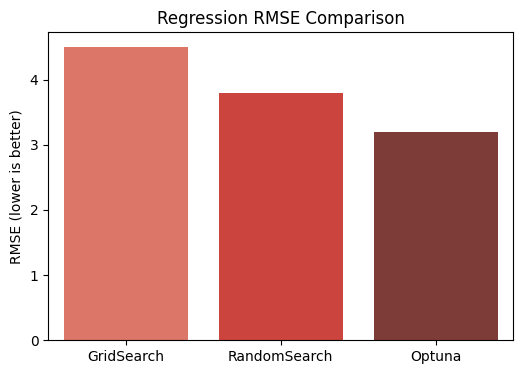

/tmp/ipython-input-2613467450.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=r2, palette="Purples_d")


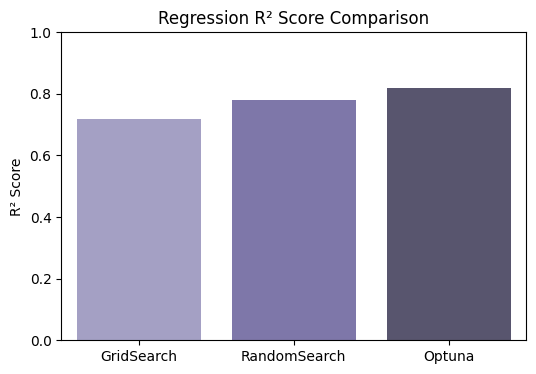

In [6]:
# Example (replace with your actual results after running code)
results_regression = {
    "GridSearch": {"rmse": 4.5, "r2": 0.72},
    "RandomSearch": {"rmse": 3.8, "r2": 0.78},
    "Optuna": {"rmse": 3.2, "r2": 0.82}
}

methods = list(results_regression.keys())
rmse = [results_regression[m]["rmse"] for m in methods]
r2 = [results_regression[m]["r2"] for m in methods]

# RMSE
plt.figure(figsize=(6,4))
sns.barplot(x=methods, y=rmse, palette="Reds_d")
plt.title("Regression RMSE Comparison")
plt.ylabel("RMSE (lower is better)")
plt.show()

# R² Score
plt.figure(figsize=(6,4))
sns.barplot(x=methods, y=r2, palette="Purples_d")
plt.title("Regression R² Score Comparison")
plt.ylabel("R² Score")
plt.ylim(0,1)
plt.show()


/tmp/ipython-input-3995125936.py:4: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


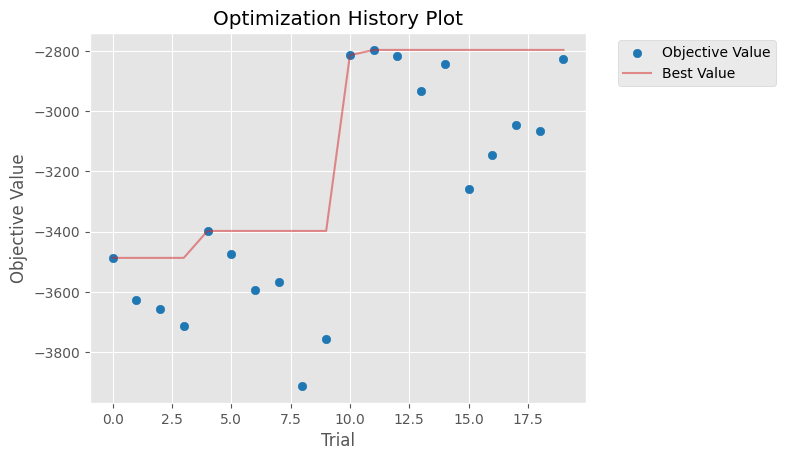

/tmp/ipython-input-3995125936.py:7: ExperimentalWarning: optuna.visualization.matplotlib._param_importances.plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)


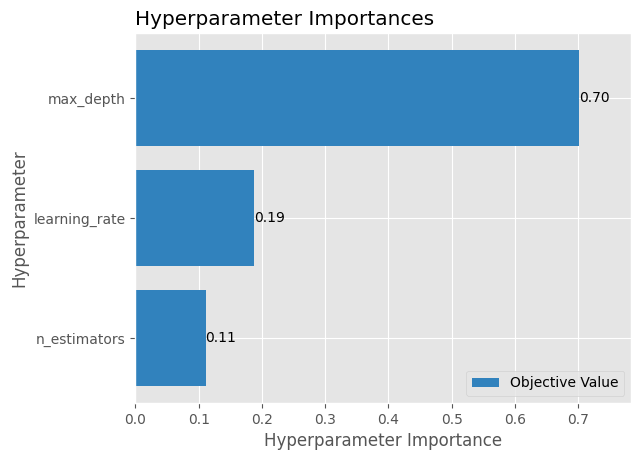

In [7]:
from optuna.visualization.matplotlib import plot_optimization_history, plot_param_importances

# For classification or regression Optuna study
plot_optimization_history(study)
plt.show()

plot_param_importances(study)
plt.show()
+